In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['price'] = boston.target

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.shape

(506, 14)

In [7]:
boston.data.shape

(506, 13)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Spliting data

In [9]:
X = df.drop('price', axis=1)
Y = df['price']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=5)

In [11]:
print(('X_train shape : {} \t Y_train shape : {}').format(X_train.shape, Y_train.shape))
print(('X_test shape  : {} \t Y_test shape  : {}').format(X_test.shape, Y_test.shape))

X_train shape : (354, 13) 	 Y_train shape : (354,)
X_test shape  : (152, 13) 	 Y_test shape  : (152,)


#### Creating Linear Regression model

In [12]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)
y_pred = lrm.predict(X_test)

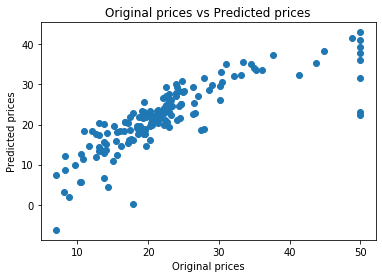

In [13]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Original prices')
plt.ylabel('Predicted prices')
plt.title('Original prices vs Predicted prices')
plt.show()

In [14]:
print(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

5.540490745781336


### Deployment of ML model

In [15]:
import pickle

In [17]:
pickle.dump(lrm, open('model.pkl', 'wb'))

##### How this model work

In [22]:
newLR = pickle.load(open('model.pkl', 'rb'))

In [23]:
print(newLR.predict([[0.38214, 0.0, 6.2, 0.0, 0.504, 8.04, 86.5, 3.2157, 8.0, 307.0, 17.4, 387.38, 3.13]]))

[37.38997666]


In [20]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,0.0,6.2,0.0,0.504,8.04,86.5,3.2157,8.0,307.0,17.4,387.38,3.13


In [24]:
Y_test.head(1)

226    37.6
Name: price, dtype: float64